In [ ]:
%pip install pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Carregar o dataset Iris
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target = iris.target


In [3]:
print(df.info())  # Verificar tipos de dados e valores nulos
print(df.describe())  # Estatísticas descritivas básicas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000 

In [5]:
# Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

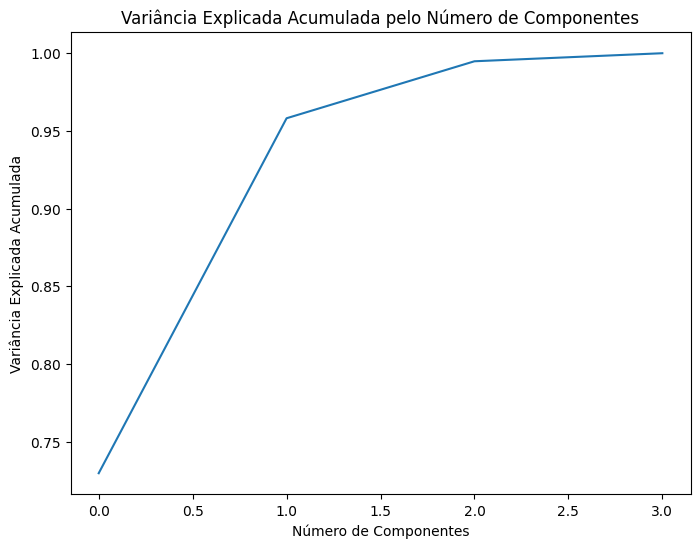

In [6]:
# Aplicar PCA
pca = PCA()
pca.fit(X_scaled)

# Gráfico de cotovelo
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada pelo Número de Componentes')
plt.show()


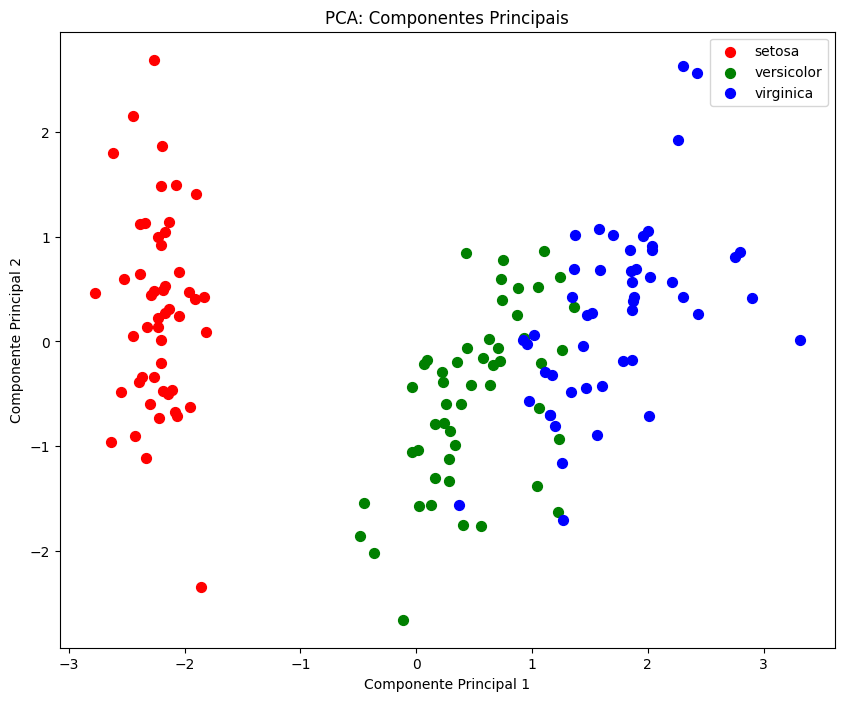

In [7]:
# Reduzir a dimensionalidade para 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Criar DataFrame com os componentes principais e o target
df_pca = pd.DataFrame(data=X_pca, columns=['Componente 1', 'Componente 2'])
df_pca['Target'] = target

# Gráfico de dispersão dos dois primeiros componentes principais
plt.figure(figsize=(10, 8))
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indices_to_keep = df_pca['Target'] == target
    plt.scatter(df_pca.loc[indices_to_keep, 'Componente 1'], 
                df_pca.loc[indices_to_keep, 'Componente 2'], 
                c=color, 
                s=50)
plt.legend(iris.target_names)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA: Componentes Principais')
plt.show()
